In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,Dropout
from keras.layers import Flatten,Dense,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_dir='/content/drive/My Drive/data/Train'
test_dir='/content/drive/My Drive/data/Test'

In [7]:
# defining the model
model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# flatten
model.add(Flatten())
# fully connected layers
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

# compilation of the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        3

In [9]:
# fittig the above model to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224,224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 9999 images belonging to 2 classes.
Found 1792 images belonging to 2 classes.


In [11]:
hist=model.fit_generator(training_set,steps_per_epoch=156,epochs=50,validation_data=test_set,validation_steps=56)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
156/156 [==============================] - 3389s 22s/step - loss: 0.1195 - accuracy: 0.9544 - val_loss: 0.8968 - val_accuracy: 0.6819
Epoch 2/50
156/156 [==============================] - 115s 737ms/step - loss: 0.0623 - accuracy: 0.9784 - val_loss: 0.0704 - val_accuracy: 0.9738
Epoch 3/50
156/156 [==============================] - 115s 737ms/step - loss: 0.0512 - accuracy: 0.9821 - val_loss: 0.0735 - val_accuracy: 0.9749
Epoch 4/50
156/156 [==============================] - 115s 735ms/step - loss: 0.0395 - accuracy: 0.9856 - val_loss: 0.0378 - val_accuracy: 0.9866
Epoch 5/50
156/156 [==============================] - 115s 734ms/step - loss: 0.0370 - accuracy: 0.9867 - val_loss: 0.0770 - val_accuracy: 0.9715
Epoch 6/50
156/156 [==============================] - 115s 737ms/step - loss: 0.0302 - accuracy: 0.9892 - val_loss: 0.0266 - val_accuracy: 0.9900
Epoch 7/50
156/156 [==============================] - 115s 737ms/step - loss: 0.0345 - accuracy: 0.9879 - val_loss: 0.1722 - 

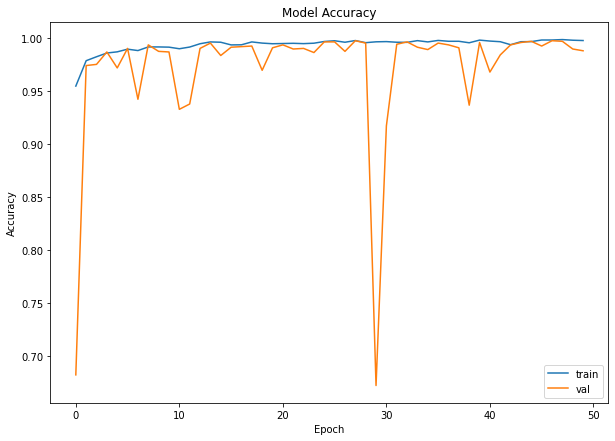

In [13]:
# plotting the figure for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

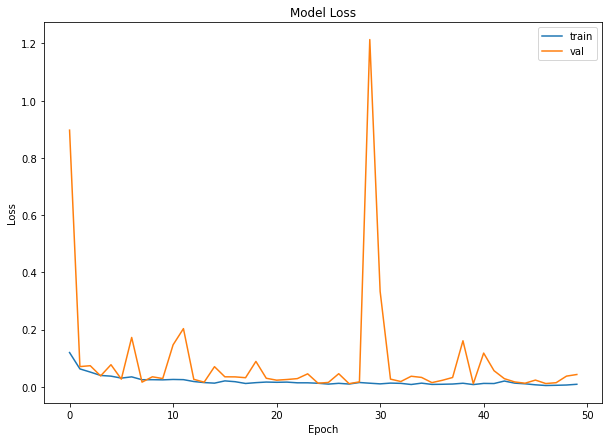

In [14]:
# plotting the figure for loss
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [15]:
model.save('mask.h5')